In [1]:
!pip install mglearn
import mglearn
import sklearn
sklearn.__version__

     |████████████████████████████████| 542kB 5.5MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=cdddca5f3dbff1746ee71b85f0469beaadd9dbd107d87a9a8446e7f7c33232e7
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


'0.22.2.post1'

# 지도학습 - 규제선형모델 (Ridge_Lasso_Regression)


Linear Regression의 문제

- 단순 선형회귀 : 단 하나의 특성(feature)을 가지고 라벨값(label) 또는 타깃(target)을 예측하기 위한
회귀 모델을 찾는 것
- 다중 선형회귀 : 여러 개의 특성을 활용해서 회귀모델을 찾는 것




다중 선형 회귀 모델은 과대적합(overfitting) 될 때가 종종 발생

주어진 샘플들의 특성값들과 라벨값의 관계를 필요이상으로 너무 자세하게 복잡하게 분석했다는 것
- 새로운 데이터가 주어졌을 때 제대로 예측해내기가 어려움 (일반화 능력이 떨어짐)
- Ridge / Lasso / Elastic Regression 등장

Bias(편향) 오차와 Variance(분산) 오차

특성이 증가하면 복잡성이 증가 -> variance는 증가, bias는 감소 -> Overfitting 발생

<center>
 <img src="https://t1.daumcdn.net/cfile/tistory/99CDCC33599AC28F07" alt="편향과 분산" width="40%" />

 Bias(편향) 오차와 Variance(분산) 오차를 표현

</center>

- bias 감소가 variance의 증가와 같아지는 최적의 point를 찾아야 함
- Overfitting 문제 해결 : 데이터의 복잡도 줄이기, 정규화를 통한 분산 감소

<center>
 <img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile9.uf.tistory.com%2Fimage%2F996DB433599AC34225B9BD" alt="모델 복잡도" width="40%" />

 모델 복잡도

</center>

학습을 시킬수록 (=모델 복잡도가 올라갈 수록) Bias(편향)은 줄어드나(↓)  Variance(분산)는 올라간다(↑)

학습이 덜될수록 (=모델 복잡도가 낮을수록) Bias(편향)은 올라가나(↑) Variance(분산)는 내려간다(↓)




|구분| 모델 복잡도| 적합성|
|---|---|---|
|Bias 오차가 낮은 & Variance 오차가 높은|복잡| 과대적합(over fitting)|
 |Bias 오차가 높은 Variance 오차가 낮은| 단순| 과소적합(under fitting)|

* Bias(편향) 에러가 높아지는 것은  많은 데이터를 고려하지 않아 (=모델이 너무 단순)  정확한 예측을 하지 못하는 경우

* Variance(분산) 에러는 노이즈까지 전부 학습하여 (=모델이 너무 복잡) 약간의 input에도 예측 Y 값이 크게 흔들리는 것

이 두가지 에러가 상호 Trade-off 관계에 있어서 이 둘을 모두 잡는 것은 불가능 한 딜레마가 발생

정규화(Regularization, 규제)

- 과대적합이 되지 않도록 모델을 강제로 제한하는 것을 의미.
- 가중치(w)의 값을 조정하여 제약을 주는 것.

- L1 규제 : Lasso
  - <font  color=yellow>w의 모든 원소에 똑같은 힘으로 규제를 적용하는 방법. 특정 계수들은 0이 됨.      
  - 특성선택(Feature Selection)이 자동으로 이루어진다.</font>

- L2 규제 : Ridge
  - <font  color=yellow>w의 모든 원소에 골고루 규제를 적용하여 0에 가깝게 만든다.</font>


## Ridge Regression

평균제곱오차식에 alpha 항이 추가
- alpha 값을 크게 하면 패널티 효과가 커지고(가중치 감소),
- alpha 값을 작게 하면 그 반대가 된다.

- 기존 선형회귀에서는 적절한 가중치와 편향을 찾아내는 것이 관건
- 추가적인 제약 조건(규제항)을 포함 – 가중치에 대한 제곱의 합을 사용
- <font  color=yellow>MSE가 최소가 되게 하는 가중치(w)와 편향(b)을 찾는</font> 동시에 <font  color=yellow> MSE와 규제항의 합이 최소</font>가 되어야 함 -> 가중치 W의 모든 원소가 0이 되거나 0에 근사하도록 -> <font  color=yellow>학습한 가중치 (W)의 제곱을 규제항 (L2 규제)</font>으로 사용

> \\( cost(W,b)\\ =MSE+규제항\\ =MSE+\alpha \cdot { L }_{ 2 }norm\\ =\cfrac { 1 }{ m } \sum\limits _{ i=1 }^{ m }{ (H({ x }^{ (i) })-{ y }^{ (i) }) } ^{ 2 }+\alpha \sum\limits _{ j=1 }^{ n }{ { w }_{ j }^{ 2 } } \\ (n : 가중치의 개수, α : 규제의 정도) \\)

> MSE에 의한 Overfitting을 줄이기 위해 α를 크게 함 -> 정확도 감소 -> α가 너무 크면 MSE의 비중이 작아져서 과소적합 가능성 증가

- α가 증가하면 bias는 증가하고 variance는 감소하며 α가 0이 되면 MSE와 동일하게 되어 선형 회귀모델이 됨 -> Ridge 모델은 <font  color=yellow>bias을 약간 손해보면서 variance를 크게 줄여</font> 성능의 향상
- 단점 : <font  color=yellow>몇몇 변수가 중요하더라도 모든 변수에 대해 적합을 해야 하고 완벽한 0은 나오지 않음</font> -> 예측의 문제가 아니라 해석의 문제

Ridge()
```
Ridge(alpha, fit_intercept, normalize, copy_X, max_iter, tol, solver, random_state)
```

- alpha : 값이 클수록 강력한 정규화(규제) 설정하여 분산을 줄임, 양수로 설정
- fit_intercept : 모형에 상수항 (절편)이 있는가 없는가를 결정하는 인수 (default : True)
- normalize : 매개변수 무시 여부
- copy_X : X의 복사 여부
- max_iter : 계산에 사용할 작업 수
- tol : 정밀도
- solver : 계산에 사용할 알고리즘 (auto, svd, cholesky, lsqr, sparse_cg, sag, saga)
- random_state : 난수 seed 설정


#### Ridge_Lasso_Regression 실습 01

확장 보스턴 집값 셋에 선형회귀 적용

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
%matplotlib inline

In [5]:
# 확장 보스턴 집값
import mglearn
from sklearn.model_selection import train_test_split

X,y = mglearn.datasets.load_extended_boston()

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
# 훈련 세트 점수
model_lr.score(X_train,y_train)

0.9520519609032727

In [7]:
# 테스트 세트 점수
model_lr.score(X_test,y_test)

0.607472195966557

- 훈련 셋에 비해 테스트 셋의 경우 정확도가 많이 떨어짐 -> 과대적합

확장 보스턴 집값 셋에 릿지회귀 적용

In [37]:
# model_ridge
model_ridge = Ridge().fit(X_train,y_train)

print('훈련세트 점수: {:.2f}'.format(model_ridge.score(X_train,y_train)))
print('테스트 세트 점수:{:.2f}'.format(model_ridge.score(X_test,y_test)))


훈련세트 점수: 0.89
테스트 세트 점수:0.75


In [38]:
model_ridge_alpha10 = Ridge(alpha=10).fit(X_train,y_train)

print('훈련세트 점수: {:.2f}'.format(model_ridge_alpha10.score(X_train,y_train)))
print('테스트 세트 점수:{:.2f}'.format(model_ridge_alpha10.score(X_test,y_test)))


훈련세트 점수: 0.79
테스트 세트 점수:0.64


In [60]:
model_ridge_alpha01 = Ridge(alpha=0.1).fit(X_train,y_train)

print('훈련세트 점수: {:.2f}'.format(model_ridge_alpha01.score(X_train,y_train)))
print('테스트 세트 점수:{:.2f}'.format(model_ridge_alpha01.score(X_test,y_test)))


훈련세트 점수: 0.93
테스트 세트 점수:0.77


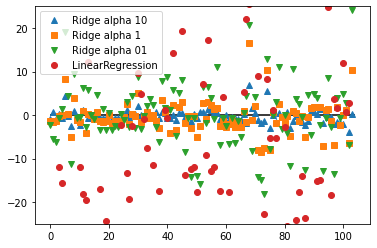

In [44]:
plt.plot(model_ridge_alpha10.coef_,'^', label = "Ridge alpha 10")
plt.plot(model_ridge.coef_,'s', label = "Ridge alpha 1")
plt.plot(model_ridge_alpha01.coef_,'v', label = "Ridge alpha 01")

plt.plot(model_lr.coef_,'o',label='LinearRegression')
plt.hlines(0,0,len(model_lr.coef_))
plt.ylim(-25,25)

plt.legend()

- x 축은 coef_의 원소를 위치대로 나열한 것 (x=0은 첫 번째 특성에 연관된 계수이고 x=1은 두 번째 특성에 연관된 계수로 x=100까지 계속)
- y 축은 각 계수의 수치

- alpha=10일 때 대부분의 계수는 -3과 3 사이에 위치
- alpha=1일 때 Ridge 모델의 계수는 좀 더 증가
- alpha=0.1일 때 계수는 더 커지며 아무런 규제가 없는(alpha=0) 선형 회귀의 계수는 값이 더 커져 그림 밖으로 넘어감.

#### 학습곡선 (Learning Curve)

데이터셋의 크기에 따른 모델의 성능 변화를 나타낸 그래프

- alpha 값을 고정하고 훈련 데이터의 크기 변화에 따른 모델의 성능 변화를 나타낸 그래프

- 보스턴 주택가격 데이터셋에서 여러 가지 크기로 샘플링하여 LinearRegression과 Ridge(alpha=1)을 적용한 것

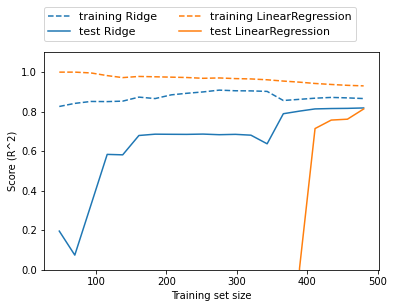

In [ ]:
mglearn.plots.plot_ridge_n_samples()

- 선형 회귀 및 리지 회귀 모두 훈련 셋에서 점수가 테스트 셋보다 높음
- 리지 회귀는 규제를 받고 있기 때문에 훈련 셋에서는 선형 회귀보다 전체적으로 점수가 낮음
- 테스트 셋에서는 선형 회귀보다 리지 회귀의 점수가 더 높음 
- 데이터 수가 400 미만인 경우 선형회귀는 학습을 하지 못하지만 리지 회귀는 학습이 가능
- 데이터의 수가 많아지면 선형 회귀의 성능이 리지 회귀의 성능이 같아짐
- 데이터가 많아지면 선형 회귀의 훈련 데이터 성능 감소 (과대 적합 감소)

## Lasso Regression

- 릿지 회귀의 단점을 해결하기 위해 대안으로 나온 방법
학습한 가중치의 절대값을 규제항(L1 규제)으로 사용 – 가중치의 절대값의 합을 사용
- 학습한 가중치의 절대값을 규제항(L1 규제)으로 사용 – 가중치의 절대값의 합을 사용

> \\(  \begin{align} 
cost(W,b)   \\ 
& =MSE+규제항 \\  
& =MSE+\alpha \cdot { L }_{ 1 }norm \\  
& =\cfrac { 1 }{ m } \sum\limits_{ i=1 }^{ m }{ (H({ x }^{ (i) })-{ y }^{ (i) }) } ^{ 2 }+\alpha \sum\limits_{ j=1 }^{ n }{ \left| { w }_{ j } \right|  }  \\
& (n:가중치의개수,α:규제의정도)  \end{align} \\)


- 적당한 α만으로 몇몇 계수를 정확하게 0으로 만들 수 있음 -> 해석을 용이하게 함
- MSE와 규제항의 합이 최소가 되게 하는 파라미터 W와 b를 찾는 것이 Lasso의 목표
- MSE항이 작아질 수록 오차가 작아지고, L1-norm이 작아질 수록 많은 가중치들이 0이 되거나 0에 가까워짐 -> 데이터 전 처리에 주로 사용 (필요 없는 데이터 제거)
- Ridge와 Lasso의 성능 차이는 사용하는 데이터의 상황에 따라 다름 -> 유의미한 변수가 적을 때는 Lasso가 반대의 경우는 Ridge가 더 좋은 성능을 보임.

Lasso()
```
Lasso(alpha, fit_intercept, normalize, precompute, copy_X, max_iter, tol, warm_start, positive, solver, random_state, selection)
```
- alpha : 값이 클수록 강력한 정규화(규제) 설정하여 분산을 줄임, 양수로 설정
- fit_intercept : 모형에 상수항 (절편)이 있는가 없는가를 결정하는 인수 (default : True)
- normalize : 매개변수 무시 여부
- precompute : 계산속도를 높이기 위해 미리 계산된 그램 매트릭스를 사용할 것인지 여부
- copy_X : X의 복사 여부
- max_iter : 계산에 사용할 작업 수
- tol : 정밀도
- warm_start : 이전 모델을 초기화로 적합하게 사용할 것인지 여부
- positive : 계수가 양수로 사용할 것인지 여부
- solver : 계산에 사용할 알고리즘 (auto, svd, cholesky, lsqr, sparse_cg, sag, saga)
- random_state : 난수 seed 설정
- selection : 계수의 업데이트 방법 설정 (random으로 설정하면 tol이 1e-4보다 높을 때 빠른 수렴)

In [52]:
from sklearn.linear_model import Lasso

# lasso
model_lasso = Lasso()
model_lasso.fit(X_train,y_train)

print('훈련세트 점수: {:.2f}'.format(model_lasso.score(X_train,y_train)))
print('테스트 세트 점수:{:.2f}'.format(model_lasso.score(X_test,y_test)))

훈련세트 점수: 0.29
테스트 세트 점수:0.21


In [54]:
model_lasso_alpha_001 = Lasso(alpha=0.01,max_iter=100000).fit(X_train,y_train)

print('훈련세트 점수: {:.2f}'.format(model_lasso_alpha_001.score(X_train,y_train)))
print('테스트 세트 점수:{:.2f}'.format(model_lasso_alpha_001.score(X_test,y_test)))
print('사용한 특성의 수 :{}'.format(np.sum(model_lasso_alpha_001.coef_ != 0)))


훈련세트 점수: 0.90
테스트 세트 점수:0.77
사용한 특성의 수 :33


In [55]:
model_lasso_alpha_00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format( model_lasso_alpha_00001.score(X_train, y_train) ))
print("테스트 세트 점수: {:.2f}".format( model_lasso_alpha_00001.score(X_test, y_test) ))
print("사용한 특성 수: {}".format(np.sum(model_lasso_alpha_00001.coef_ != 0 )))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성 수: 96


(-15.0, 15.0)

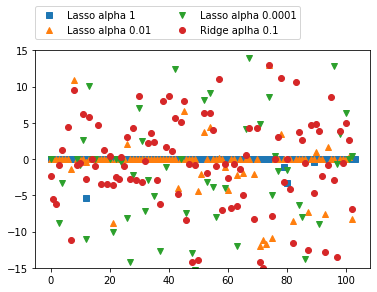

In [61]:
plt.plot(model_lasso.coef_, 's', label='Lasso alpha 1')
plt.plot(model_lasso_alpha_001.coef_, '^', label='Lasso alpha 0.01')
plt.plot(model_lasso_alpha_00001.coef_, 'v', label='Lasso alpha 0.0001')

plt.plot(model_ridge_alpha01.coef_, 'o', label='Ridge aplha 0.1')
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-15, 15)

- alpha=1일 때 가중치가 대부분 0
- alpha=0.01이면 0이 되는 특성이 약간 감소
- alpha=0.0001이면 규제가 약해져서 값도 커짐

- alpha=0.1인 리지 회귀는 alpha=0.01인 라쏘 회귀와 성능이 비슷하지만 리지 회귀를 사용하면 어떤 계수도 0이 되지 않음.

- 보통 리지 회귀를 주로 사용하지만 특성이 많고 그 중 일부분만 사용하고자 한다면 라쏘가 좋은 선택

## ElasticNet Regression

- 선형 회귀에 2가지 규제항 (L1 규제항, L2 규제항)을 추가한 것

> \begin{align}
cost(W,b)\\ 
& =MSE+규제항\\
& =MSE+ { \alpha }_{ 1 }\cdot { L }_{ 1 }norm + { \alpha }_{ 2 }\cdot { L }_{ 2 }norm\\
& =\cfrac { 1 }{ m } \sum\limits _{ i=1 }^{ m }{ (H({ x }^{ (i) })-{ y }^{ (i) }) } ^{ 2 } +\alpha _{ 1 }\sum\limits _{ j=1 }^{ n }{ \left| { w }_{ j } \right|  +\alpha _{ 2 }\sum\limits_{ j=1 }^{ n }{ { w }_{ j }^{ 2 } } } \\
& (n:가중치의개수,α:규제의정도) \end{align}

ElasticNet()
```
ElasticNet(alpha, l1_ratio, fit_intercept, normalize, precompute, max_iter, copy_X,
tol, warm_start, positive, random_state, selection)
```
- alpha : 값이 클수록 강력한 정규화(규제) 설정하여 분산을 줄임, 양수로 설정
- l1_ratio : L1 규제의 비율 (혼합비율?)
- fit_intercept : 모형에 상수항 (절편)이 있는가 없는가를 결정하는 인수 (default : True)
- normalize : 매개변수 무시 여부
- precompute : 계산속도를 높이기 위해 미리 계산된 그램 매트릭스를 사용할 것인지 여부
- copy_X : X의 복사 여부
- max_iter : 계산에 사용할 작업 수
- tol : 정밀도
- warm_start : 이전 모델을 초기화로 적합하게 사용할 것인지 여부
- positive : 계수가 양수로 사용할 것인지 여부
- random_state : 난수 seed 설정
- selection : 계수의 업데이트 방법 설정 (random으로 설정하면 tol이 1e-4보다 높을 때 빠른 수렴)

## 다항회귀

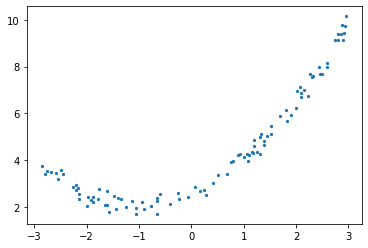

In [62]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n = 100

x = 6 * np.random.rand(n, 1) - 3
y = 0.5 * x**2 + x + 2 + np.random.rand(n, 1)

plt.scatter(x, y, s=5)

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 데이터 변환 과정과 머신러닝을 연결해주는 파이프라인
from sklearn.pipeline import make_pipeline  

poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)
x.shape, x_poly.shape

((100, 1), (100, 2))

In [64]:
x[0], x_poly[0]

(array([-0.23853121]), array([-0.23853121,  0.05689714]))

In [65]:
model = LinearRegression()
model.fit(x_poly, y)
model.intercept_, model.coef_

(array([2.5907856]), array([[0.99165156, 0.48251016]]))

In [66]:
# make_pipeline
model_lr = make_pipeline(poly_features, LinearRegression())
model_lr.fit(x, y)
print(model_lr.steps[1][1].coef_)
model_lr.steps

[[0.99165156 0.48251016]]


[('polynomialfeatures',
  PolynomialFeatures(degree=2, include_bias=False, interaction_only=False,
                     order='C')),
 ('linearregression',
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False))]

In [ ]:
xx = np.linspace(-3, 3, 1000)
xx = xx[:, np.newaxis]    # xx.reshape(-1,1)

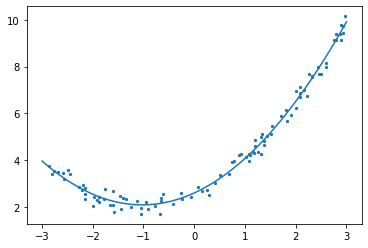

In [68]:
# 다항회귀 그래프
plt.scatter(x, y, s=5)
# x_poly.shape
# y.shape
# x.shape
xx = np.linspace(-3, 3, 1000)
plt.plot(xx, model_lr.predict(xx[:, np.newaxis]))   # newaxis = None
plt.show()

#### PolynomialFeatures()
```
PolynomialFeatures(degree=2, *, interaction_only=False, include_bias=True)
```

- degree : 차수
- interaction_only: True면 2차항에서 상호작용항만 출력
- include_bias : 상수항 생성 여부


다항 변환

- 입력값  x 를 다항식으로 변환한다.

> \\( x \;\; \rightarrow \;\; [ 1, x, x^2, x^3, \cdots ] \\) <br>
 
> 만약 열의 갯수가 두 개이고 2차 다항식으로 변환하는 경우에는 다음처럼 변환한다.

> \\( [x_1, x_2] \;\; \rightarrow \;\; [ 1, x_1, x_2, x_1^2, x_1x_2, x_2^2 ] \\)  <br>

> 예) <br>
> \\( [x_1=0, x_2=1]  \;\; \rightarrow \;\; [1, 0, 1, 0, 0, 1] \\) <br>

> \\( [x_1=2, x_2=3]  \;\; \rightarrow \;\; [1,2,3,4,6,9] \\)
 


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [ ]:
poly = PolynomialFeatures(2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [ ]:
# 다항차수는 적용하지 않고, 오직 상호작용(교호작용) 효과만을 분석하려면 
# interaction_only=True 옵션을 설정해주면 됩니다. 
# degree를 가지고 교호작용을 몇 개 수준까지 볼지 설정해줄 수 있습니다.

poly = PolynomialFeatures(interaction_only=True)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

## Linear / Ridge / Lasso / ElasticNet Regression의 비교

|구분| 릿지회귀| 라쏘회귀| 엘라스틱넷|
|---|---|---|---|
|제약식| L2 norm| L1 norm| L1+L2 norm|
|변수선택 |불가능| 가능| 가능|
|solution| closed form| 명시해 없음| 명시해 없음|
|장점| 변수간 상관관계가 높아도 좋은 성능| 변수간 상관관계가 높으면 성능↓| 변수간 상관관계를 반영한 정규화|
|특징| 크기가 큰 변수를 우선 적으로 줄임|비중요 변수를 우선적 으로 줄임|상관관계가 큰 변수를 동시에 선택/배제|

In [96]:
# 데이터 생성
import numpy as np
import pandas as pd
import seaborn as sb

def make_nonlinear(seed=0):
    np.random.seed(seed)  # 랜덤 시작값 초기화
    n_samples = 30
    X = np.sort(np.random.rand(n_samples))
    y = np.sin(2 * np.pi * X) + np.random.randn(n_samples) * 0.1
    X = X[:, np.newaxis]  # X.reshape(-1,1)
    return (X, y)


X, y = make_nonlinear()
dfX = pd.DataFrame(X, columns=["x"])
dfY = pd.DataFrame(y, columns=["y"])
df = pd.concat([dfX, dfY], axis=1)
df.head()

,x,y
0,0.020218,0.213138
1,0.071036,0.357444
2,0.087129,0.747487
3,0.118274,0.531167
4,0.143353,0.788347


(-1.5, 1.5)

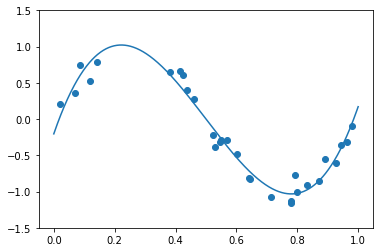

In [99]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline  # 데이터 변환 과정과 머신러닝을 연결해주는 파이프라인
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
import matplotlib.pyplot as plt

# LinearRegression
poly = PolynomialFeatures(3)
model_lr = make_pipeline(poly, LinearRegression())
model_lr.fit(X, y)

xx = np.linspace(0, 1, 1000)
y_pred = model_lr.predict(xx.reshape(-1, 1))

plt.scatter(X, y)
plt.plot(xx, y_pred)
plt.ylim(-1.5, 1.5)

(-1.5, 1.5)

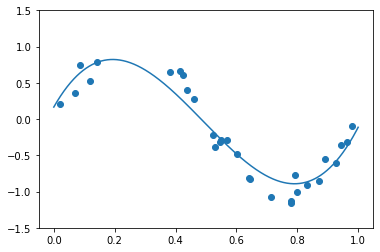

In [101]:
# Ridge Regression
model_ridge = make_pipeline(poly, Ridge(alpha=0.001))
model_ridge.fit(X, y)

xx = np.linspace(0, 1, 1000)
y_pred = model_ridge.predict(xx.reshape(-1, 1))

plt.scatter(X, y)
plt.plot(xx, y_pred)
plt.ylim(-1.5, 1.5)

(-1.5, 1.5)

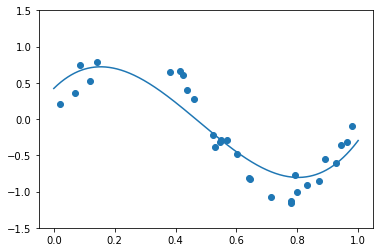

In [111]:
# Lasso Regression
model_lasso = make_pipeline(poly, Lasso(alpha=0.001,max_iter=10000))
model_lasso.fit(X, y)

xx = np.linspace(0, 1, 1000)
y_pred = model_lasso.predict(xx.reshape(-1, 1))

plt.scatter(X, y)
plt.plot(xx, y_pred)
plt.ylim(-1.5, 1.5)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7331754611257302, tolerance: 0.0011241505319565602
  positive)


(-1.5, 1.5)

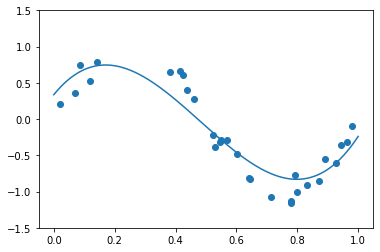

In [115]:
# ElasticNet Regression
model_elasticnet = make_pipeline(poly, ElasticNet(alpha=0.0001,l1_ratio=0.5))
model_elasticnet.fit(X, y)

xx = np.linspace(0, 1, 1000)
y_pred = model_elasticnet.predict(xx.reshape(-1, 1))

plt.scatter(X, y)
plt.plot(xx, y_pred)
plt.ylim(-1.5, 1.5)